<a href="https://colab.research.google.com/github/Victoresteban-bit/METODOS-NUMERICS/blob/main/Fen%C3%B3meno_Runge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

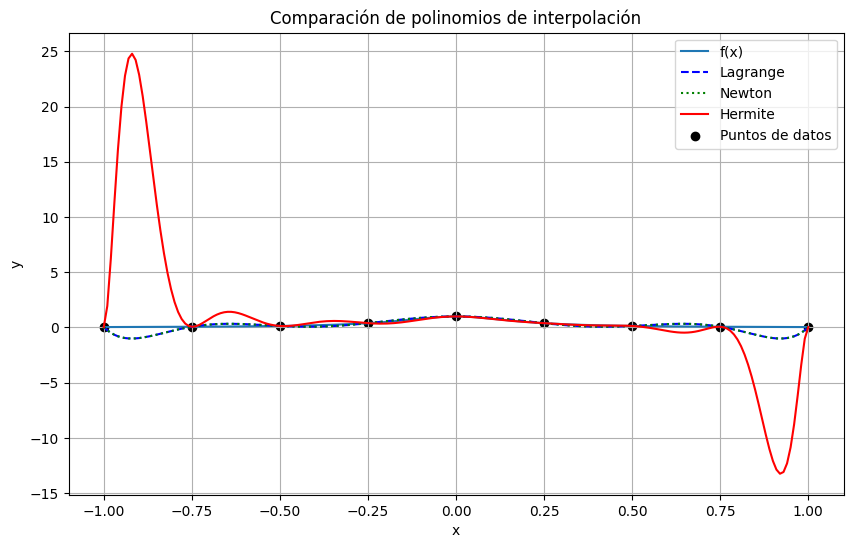

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Función a interpolar
def f(x):
  return 1 / (1 + 25 * x**2)

# Puntos igualmente espaciados
n = 9
x_data = np.linspace(-1, 1, n)
y_data = f(x_data)

# 1.a) Polinomio de Lagrange
def lagrange_polynomial(x_data, y_data):
  x = sp.symbols('x')
  n = len(x_data)
  polynomial = 0
  for i in range(n):
    L = 1
    for j in range(n):
      if i != j:
        L *= (x - x_data[j]) / (x_data[i] - x_data[j])
    polynomial += y_data[i] * L
  return sp.simplify(polynomial)

# 1.b) Polinomio de Newton
def divided_diff(x, y):
  n = len(y)
  coef = np.zeros([n, n])
  coef[:, 0] = y

  for j in range(1, n):
    for i in range(n - j):
      coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])

  return coef

def newton_polynomial(x_data, y_data):
  x = sp.symbols('x')
  coef = divided_diff(x_data, y_data)
  n = len(x_data)
  polynomial = coef[0][0]

  for j in range(1, n):
    term = coef[0][j]
    for i in range(j):
      term *= (x - x_data[i])
    polynomial += term
  return polynomial

# 1.c) Polinomio de Hermite (requiere derivadas)
def f_prime(x):
    return -50 * x / (1 + 25 * x*2)*2

def hermite(x_datos, y_datos, x_interp):
    n = len(x_datos)
    z = np.zeros(2 * n)
    Q = np.zeros((2 * n, 2 * n))

    for i in range(n):
        z[2 * i] = z[2 * i + 1] = x_datos[i]
        Q[2 * i][0] = Q[2 * i + 1][0] = y_datos[i]
        Q[2 * i + 1][1] = f_prime(x_datos[i])
        if i != 0:
            Q[2 * i][1] = (Q[2 * i][0] - Q[2 * i - 1][0]) / (z[2 * i] - z[2 * i - 1])

    for i in range(2, 2 * n):
        for j in range(2, i + 1):
            Q[i][j] = (Q[i][j - 1] - Q[i - 1][j - 1]) / (z[i] - z[i - j])

    def eval_hermite(x_val):
        result = Q[0][0]
        prod = 1.0
        for i in range(1, 2 * n):
            prod *= (x_val - z[i - 1])
            result += Q[i][i] * prod
        return result

    return [eval_hermite(xi) for xi in x_interp]

# Puntos para la interpolación (más puntos para una curva suave)
x_interp = np.linspace(-1, 1, 200)  # Increased number of points

# Calcular los polinomios
y_lagrange = [lagrange_polynomial(x_data, y_data).subs('x', xi) for xi in x_interp]
y_newton = [newton_polynomial(x_data, y_data).subs('x', xi) for xi in x_interp]
y_hermite = hermite(x, y, x_interp)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(x_interp, f(x_interp), label='f(x)')
plt.plot(x_interp, y_lagrange, label='Lagrange', linestyle='--', color='blue')
plt.plot(x_interp, y_newton, label='Newton', linestyle=':', color='green')
plt.plot(x_interp, y_hermite, label='Hermite', linestyle='-', color='red')
plt.scatter(x_data, y_data, color='black', label='Puntos de datos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de polinomios de interpolación')
plt.legend()
plt.grid(True)
plt.show()
